# Exercise 3 (Clustering)

Πουλος Βασίλης: 2805  
Κωστάκης Ελευθέριος-Παναγιώτης: 2741

## Loading data

In [24]:
import pandas as pd
import numpy as np
import json
import time 

dataset_path = '../yelp-dataset/' # Change this path to match your local dataset folder path

business_filename = 'yelp_academic_dataset_business.json'
review_filename = 'yelp_academic_dataset_review.json'

# Reading business file
start = time.time()

list_business = []
categories_order = ['Beauty & Spas', 'Shopping', 'Bars']

with open(dataset_path + business_filename, 'r', encoding="utf8") as buisness_file:
    for line in buisness_file:
        json_dict = json.loads(line)
        if  json_dict['city'] == 'Toronto' and \
            json_dict['review_count'] >= 10 and \
            json_dict['categories'] is not None: # and \
            #any(word in json_dict['categories'] for word in categories_order):
                cat = [x.strip(" ") for x in json_dict['categories'].split(",")]
                if "Beauty & Spas" in cat:
                    temp_cat = "Beauty & Spas"
                    list_business.append([json_dict['business_id'], temp_cat])
                elif "Shopping" in cat:
                    temp_cat = "Shopping"
                    list_business.append([json_dict['business_id'], temp_cat])
                elif "Bars" in cat:
                    temp_cat = "Bars"
                    list_business.append([json_dict['business_id'], temp_cat]) 
                # The following line makes sure that every buisness categoy is
                # set to one of the categories_order list in that specific order.
                # temp_cat = [cat for cat in categories_order if cat in json_dict['categories']][0]
                # list_business.append([json_dict['business_id'], temp_cat])

stop = time.time()
print("Read file in {:.3f} seconds".format(stop-start))

df_buisness = pd.DataFrame(list_business, columns=['business_id', 'categories'])
display(df_buisness.head())
print('{} businesses in df_buisness'.format(df_buisness['business_id'].size))

Read file in 2.284 seconds


,business_id,categories
0,cicPsia8Wj-DNRkmLbD_xg,Bars
1,xVXyrTWbG8U3szze-aA7eg,Bars
2,e-tRKAC-q40SqQfAOwYa-A,Beauty & Spas
3,C9keC4mWuXdl2mYFHZXudQ,Shopping
4,PFS9kf3U-ZCvpqay3AaNnQ,Shopping


2991 businesses in df_buisness


In [25]:
# Extracting unique buisness ids
np_businesses = np.array(list_business)
np_businesses_ids = np_businesses[:,0]
np_businesses_ids

array(['cicPsia8Wj-DNRkmLbD_xg', 'xVXyrTWbG8U3szze-aA7eg',
       'e-tRKAC-q40SqQfAOwYa-A', ..., 'wjqOdj0XJUDOOtU9LjRlWQ',
       'AqpB2IoLkUupDCuH-hmVdg', '0hudPyuCBlKg79OwKBw-eQ'], dtype='<U22')

In [26]:
def find_buisness_index(business_id):
    index = np.where(np_businesses_ids == business_id)[0]
    return index

# Reading reveiws file
start = time.time()
business_reviews = [[] for i in range(int(len(np_businesses_ids)))]

with open(dataset_path + review_filename, 'r', encoding="utf8") as reviews_file:
    for line in reviews_file:
        json_dict = json.loads(line)
        index = find_buisness_index(json_dict['business_id'])
        if index.size > 0:
            if len(business_reviews[index[0]]) == 0:
               business_reviews[index[0]] = json_dict['text']
            else:
               business_reviews[index[0]] += json_dict['text']

stop = time.time()
print("Read file in {:.3f} mins".format((stop-start)/60))

Read file in 4.488 mins


Reading time: about 5 mins

In [27]:
df_business_reviews = pd.DataFrame(business_reviews, columns=['reviews as a single string for each buisness'])
df_business_reviews

,reviews as a single string for each buisness
0,"Consistently good, as the Keg tends to be.\n\n..."
1,I would give zero stars. I came here with a gr...
2,A blissful experience! I highly recommended th...
3,If you're a boy and you want to wear some hot ...
4,"As a country girl, I often find myself missing..."
...,...
2986,Good tacos in the downtown core are hard to co...
2987,This used to be my favourite place. It was alw...
2988,Very welcoming place. Great setup and super fr...
2989,I can't beleive I am saying this... but I left...


## TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# Load custom stopwords 
# source: https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/resources/stopwords.txt
with open('stopwords.txt', 'r') as text_file:
    lines = text_file.read().split('\n')

stop_words = text.ENGLISH_STOP_WORDS.union(lines)

# Allowing words that are alpharithmetics more than 2 chars, excluding
# common words that exist in more than max_df of docs and rare words that
# exist in less than min_df of docs.
tfidf = TfidfVectorizer(min_df=0.25,
                        max_df=0.85,
                        max_features=8000,
                        token_pattern=r'(?u)\b[A-Za-z][A-Za-z]+\b',
                        lowercase=True,
                        stop_words=stop_words)

document_term_matrix = tfidf.fit_transform(business_reviews)

In [29]:
import random 
samples_num = 30
print('Sample of words included in the features:\n{}\n\n'.format(random.sample(tfidf.get_feature_names(), samples_num)))
print('Sample of effective stop words list.:\n{}'.format(random.sample(tfidf.get_stop_words(), samples_num)))

Sample of words included in the features:
['seats', 'bit', 'beautiful', 'comes', 'high', 'months', 'card', 'water', 'play', 'bigger', 'simple', 'quickly', 'unique', 'feel', 'fries', 'brought', 'fairly', 'owners', 'casual', 'credit', 'limited', 'modern', 'turned', 'today', 'highly', 'checked', 'covered', 'hoping', 'days', 'felt']


Sample of effective stop words list.:
['find', 'see', 'thick', 'wherein', 'whencesoever', 'whereafter', 'eight', 'whiles', 'below', 'otherwise', 'nothings', 'their', 'despited', 'as', 'rathest', 'r', 'ain', 'furthered', 'appear', 'seeming', 'into', 'wanted', 'again', 'bar', 'take', 'twelve', 'should', 'why', 'indicate', 'for']


## Kmeans and Agglomerative Clustering

In [30]:
from sklearn.cluster import KMeans
import sklearn.cluster as sk_cluster
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-paper')

# True values table: Μatching categories to numbers
true_labels = np_businesses[:,1]
for i in range(len(true_labels)):
    if true_labels[i]=='Bars':
        true_labels[i]=0
    if true_labels[i]=='Beauty & Spas':
        true_labels[i]=1
    if true_labels[i]=='Shopping':
        true_labels[i]=2
    
true_labels = [int(i) for i in true_labels] 

def disp_cluster_values(data, labels):
    df = pd.DataFrame(data.todense(), columns=tfidf.get_feature_names())
    df['category'] = labels
    new_df = df.groupby(['category']).mean()
    cluster0 = new_df.iloc[0]
    cluster1 = new_df.iloc[1]
    cluster2 = new_df.iloc[2]
    display(cluster0.sort_values(ascending=False).head(10))
    display(cluster1.sort_values(ascending=False).head(10))
    display(cluster2.sort_values(ascending=False).head(10))

def Kmeans_winfo(n_clusters, true_labels, data):
    kmeans = KMeans(init='k-means++', 
                    n_clusters=n_clusters, 
                    n_init=25, 
                    max_iter=600,  
                    random_state=42)

    predictions = kmeans.fit_predict(data)
    error = kmeans.inertia_
    cfm = confusion_matrix(true_labels, predictions) 

    # Mapping kmeans labels 
    mapping = list(np.argmax(cfm, axis=0))
    mapped_kmeans_labels = [0 for i in range(len(predictions))]
    for i in range(len(predictions)):
        mapped_kmeans_labels[i] = mapping[predictions[i]]

    score = silhouette_score(data, mapped_kmeans_labels)
    mapped_cfm = confusion_matrix(true_labels, mapped_kmeans_labels)
    precision = precision_score(true_labels, mapped_kmeans_labels, average=None)
    weighted_precision = precision_score(true_labels, mapped_kmeans_labels, average='weighted')
    recall = recall_score(true_labels, mapped_kmeans_labels, average = None)
    weighted_recall = recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
    
    
    # Display info
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)

    # PCA 
    reduced_data = PCA(n_components=2).fit_transform(data.todense())
    centers_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)
    
    plt.title('PCA Cluster Plot')
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=predictions ,s=50, cmap='viridis', alpha= 0.6)
    plt.scatter(centers_2d[:,0], centers_2d[:,1], 
                marker='o', s=200, c='black', alpha=0.5)

    axis_labels = ['Bars', 'Beauty & Spas', 'Shopping']
    plt.subplot(1, 3, 2)
    plt.title('Confusion Matrix')
    plt.axis('square')
    sns.heatmap(cfm, annot=True, cmap='Blues', cbar=False, fmt='d', xticklabels=axis_labels,
                yticklabels=axis_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 3, 3)
    plt.title('Mapped Confusion Matrix')
    plt.axis('square')
    sns.heatmap(mapped_cfm, annot=True, cmap='Blues', cbar=False, fmt='d', xticklabels=axis_labels,
                yticklabels=axis_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Precision : {}".format(precision))
    print("Weighted precision: {:.3f}".format(weighted_precision))
    print("Recall : {}".format(recall))
    print("Weighted recall: {:.3f}".format(weighted_precision))
    print("Score : {:.3f}".format(score))

    return mapped_kmeans_labels, predictions, centers_2d

In [31]:
def display_agglomerative_info(true_labels, predictions, data):
    cfm = confusion_matrix(true_labels, predictions) 

    mapping = list(np.argmax(cfm, axis=0))
    mapped_kmeans_labels = [0 for i in range(len(predictions))]
    for i in range(len(predictions)):
        mapped_kmeans_labels[i] = mapping[predictions[i]]

    score = silhouette_score(data, mapped_kmeans_labels)
    mapped_cfm = confusion_matrix(true_labels, mapped_kmeans_labels)
    precision = precision_score(true_labels, mapped_kmeans_labels, average=None)
    weighted_precision = precision_score(true_labels, mapped_kmeans_labels, average='weighted')
    recall = recall_score(true_labels, mapped_kmeans_labels, average = None)
    weighted_recall =recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
    
    # Display info
    plt.figure(figsize=(15, 5))
    x_axis_labels = ['Bars', 'Beauty & Spas', 'Shopping']
    plt.title('Mapped Confusion Matrix')
    plt.axis('square')
    sns.heatmap(mapped_cfm, annot=True, cmap='Blues', cbar=False, fmt='d', xticklabels=x_axis_labels,
                        yticklabels=x_axis_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Precision : {}".format(precision))
    print("Weighted precision: {:.3f}".format(weighted_precision))
    print("Recall : {}".format(recall))
    print("Weighted recall: {:.3f}".format(weighted_precision))
    print("Score : {:.3f}".format(score))

## Part 1

We answer part 3 of the question with the pca cluster plots at part 1 and part 2. 

### Kmeans

In [32]:
n0 = true_labels.count(0)
n1 = true_labels.count(1)
n2 = true_labels.count(2)
print('Bars: {}\nBeauty & Spas: {}\nShopping: {}\nSum: {}'.format(n0, n1, n2, n0+n1+n2))

Bars: 1258
Beauty & Spas: 826
Shopping: 907
Sum: 2991


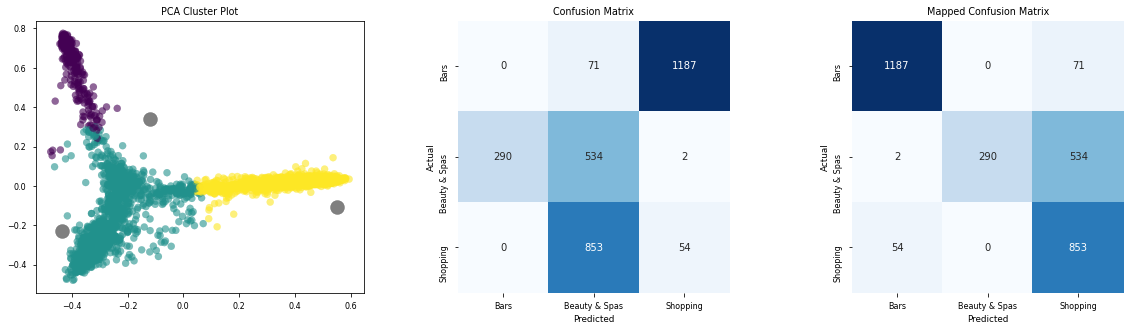

Precision : [0.95494771 1.         0.58504801]
Weighted precision: 0.855
Recall : [0.94356121 0.35108959 0.94046307]
Weighted recall: 0.855
Score : 0.162


In [33]:
labels_c3, pred_c3, centers_2d_c3 = Kmeans_winfo(3, true_labels, document_term_matrix)

Kmeans for 3 clusters returns good precision for the first two classifiers but lower for the third one
("Shopping"). As for the recall values per classifier, the recall for the first and last classifiers
is high but for "Beauty & Spas" is low. This indicates that the "Shopping" classifier labeled as 
possitive samples that were negative and the "Beauty & Spas" classifier was unable to label all the
the possitive samples. In simple words some buisnesses that should have been in the "Beauty & Spas"
classifier were "misplaced" in the "Shopping" classifier. The reason of the misplacement of those 
buisnesses is the highly overlapping in the clusters which is shown by the silhouette coefficient (score).

#### Display top 10 words for each cluster

In [34]:
disp_cluster_values(document_term_matrix, labels_c3)

food          0.347525
menu          0.136036
drinks        0.123088
beer          0.120672
ordered       0.111927
restaurant    0.109622
night         0.104637
chicken       0.104126
patio         0.089855
fries         0.082976
Name: 0, dtype: float64

hair         0.716851
cut          0.280306
colour       0.086204
job          0.060563
style        0.047976
asked        0.044554
look         0.043568
amazing      0.043514
shop         0.042161
recommend    0.040817
Name: 1, dtype: float64

store        0.199691
shop         0.076897
location     0.057920
told         0.057808
selection    0.057381
buy          0.056102
work         0.053064
price        0.052447
clean        0.051314
stores       0.051304
Name: 2, dtype: float64

## Agglomerative

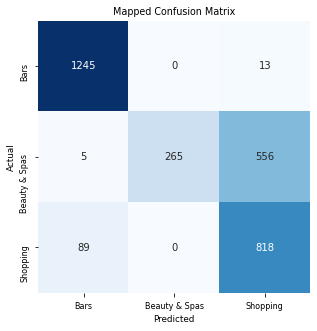

Precision : [0.92979836 1.         0.58976208]
Weighted precision: 0.846
Recall : [0.98966614 0.32082324 0.90187431]
Weighted recall: 0.846
Score : 0.160


In [35]:
from sklearn.cluster import AgglomerativeClustering

data_for_agglo = document_term_matrix.todense()
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
predictions = agglomerative.fit_predict(data_for_agglo)
display_agglomerative_info(true_labels, predictions, data_for_agglo)

Here we get similar results as kmeans, thats because 'ward' clusters 
also uses SSE to determine when two clusters should be merged.

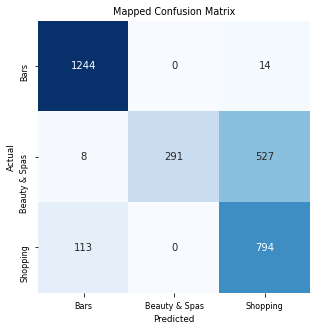

Precision : [0.91135531 1.         0.59475655]
Weighted precision: 0.840
Recall : [0.98887122 0.35230024 0.87541345]
Weighted recall: 0.840
Score : 0.160


In [36]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
predictions = agglomerative.fit_predict(data_for_agglo)
display_agglomerative_info(true_labels, predictions, data_for_agglo)

'Complete' linkage will merge two clusters when all pairs of 
elements have been linked. Because of this strict criterion gives
this method an advantage on dense datasets. This is reflected on
our metrics results, we have only a small number of false labels
even though the silhouette coefficient is low.

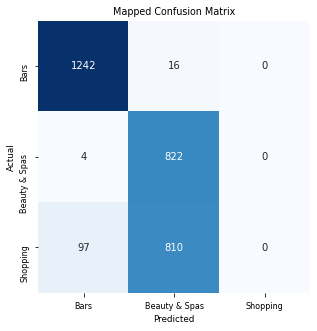

Precision : [0.92479523 0.49878641 0.        ]
Weighted precision: 0.527
Recall : [0.9872814  0.99515738 0.        ]
Weighted recall: 0.527
Score : 0.133


In [37]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
predictions = agglomerative.fit_predict(data_for_agglo)
display_agglomerative_info(true_labels, predictions, data_for_agglo)

Group average manages to any classifiers. That is because 
this method is biased towards globular which is not true in our case.

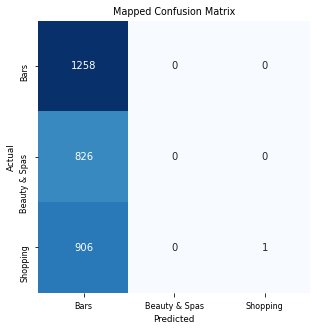

Precision : [0.42073579 0.         1.        ]
Weighted precision: 0.480
Recall : [1.         0.         0.00110254]
Weighted recall: 0.480
Score : 0.059


In [38]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
predictions = agglomerative.fit_predict(data_for_agglo)
display_agglomerative_info(true_labels, predictions, data_for_agglo)

Single method fails to find any of the classifiers as it merges all of our samples in a big cluster. Our dataset is dense and noisy both 
of which are limiting factors for this method.

## Part 2

### Running kmeans for a different number of cluster 

In [39]:
n_clusters = 12
max_score = 0
error = np.zeros(n_clusters+1)
score = np.zeros(n_clusters+1)
for k in range(2,n_clusters+1):     
    start = time.time()
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=25, max_iter=600,  random_state=42)
    preds = kmeans.fit_predict(document_term_matrix)
    error[k] = kmeans.inertia_
    score[k] = silhouette_score(document_term_matrix, preds)
    if (score[k] > max_score):
        f_clasters = k 
        max_score = score[k]
    stop = time.time()
    #print('Clusters {} finished, time {:.2f}s, score {:.2f}'.format(k, stop-start, score[k]))

### Silhouette plot

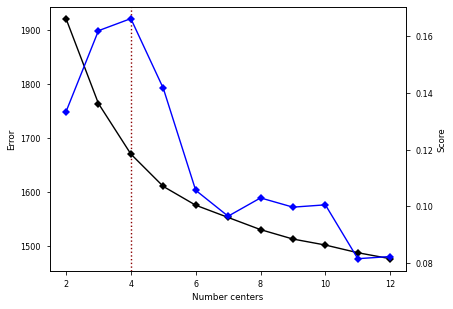

Best number of clusters 4, with silouhette coefficient of 0.1661.


In [40]:
# Displaying results
fig, ax1 = plt.subplots()
#plt.figure(figsize=(20, 6))
ax1.axvline(x=f_clasters, color='darkred', linestyle=':')
ax1.plot(np.array(range(2,n_clusters+1)), error[2:], marker='D', color='k')
ax1.set_xlabel('Number centers')
ax1.set_ylabel('Error')

ax2 = ax1.twinx()
ax2.plot(np.array(range(2,n_clusters+1)), score[2:], marker='D', color='b')
ax2.set_ylabel('Score')
fig.tight_layout()
plt.show()

print('Best number of clusters {}, with silouhette coefficient of {:.4f}.'.format(f_clasters, max_score))

We chose a number of cluster where kmeans has high silhouette 
coefficient score and low SSE.

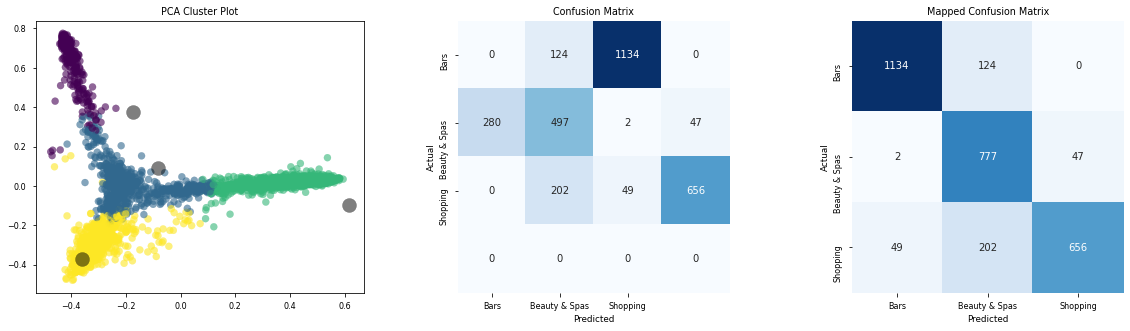

Precision : [0.95696203 0.70444243 0.93314367]
Weighted precision: 0.880
Recall : [0.90143084 0.94067797 0.72326351]
Weighted recall: 0.880
Score : 0.145


In [41]:
labels_c4, pred_c4, centers_2d_c4 = Kmeans_winfo(f_clasters, true_labels, document_term_matrix)

The results are improved, recall per cluster has better values than 
before and most of the misplaced buisnesses were placed in the correct
category.
In the cluster plot we can see that the 4th center is placed close to 
a dense part of the plot, this fixes part of the problem we had earlier. We can see that we now have more false values in the mapped 
confusion matrix at the second classifier. Since the new cluster is 
close to values that were previously part of other clusters some of those values are merged into the second category after the mapping.

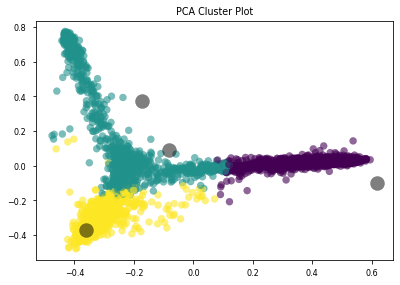

In [42]:
reduced_data = PCA(n_components=2).fit_transform(document_term_matrix.todense())

plt.title('PCA Cluster Plot')
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_c4 ,s=50, cmap='viridis', alpha= 0.6)
plt.scatter(centers_2d_c4[:,0], centers_2d_c4[:,1], 
            marker='o', s=200, c='black', alpha=0.5)
plt.show()

In this plot we can see the three final categories. The new centroid 
was merged with the top centroid and took some of the values that were 
close to it.

### Display top 10 words for each classifier

In [43]:
disp_cluster_values(document_term_matrix, labels_c4)

food          0.360694
menu          0.140987
beer          0.122503
drinks        0.119956
ordered       0.115875
restaurant    0.114061
chicken       0.108937
night         0.100201
patio         0.091339
fries         0.086662
Name: 0, dtype: float64

hair         0.212164
cut          0.088745
job          0.069481
clean        0.065532
work         0.059502
told         0.058055
recommend    0.055026
amazing      0.051806
skin         0.051018
asked        0.050664
Name: 1, dtype: float64

store        0.384251
shop         0.116344
stores       0.100521
buy          0.096223
selection    0.095747
items        0.089327
location     0.076827
products     0.071529
shopping     0.071213
stuff        0.066225
Name: 2, dtype: float64